In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# 128. Logistic Regression with Scikit-Learn - Part One - EDA

In [ ]:
df_path = Path.cwd() / '..' / '..' / 'data' / 'hearing_test.csv'

In [ ]:
df = pd.read_csv(df_path)

In [ ]:
df.describe()

In [ ]:
df['test_result'].value_counts()

In [ ]:
sns.countplot(data=df, x='test_result')

In [ ]:
sns.boxplot(data=df, y='physical_score', x='test_result')

In [ ]:
plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.5)

In [ ]:
sns.pairplot(data=df, hue='test_result')

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
sns.scatterplot(data=df, x='physical_score', y='test_result')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [ ]:
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

# 129. Logistic Regression with Scikit-Learn - Part Two - Model Training

In [ ]:
X = df.drop('test_result', axis=1)

In [ ]:
y = df['test_result']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train, y_train)

In [ ]:
log_model.coef_

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
y_pred

# 133. Logistic Regression with Scikit-Learn - Part Three - Performance Evaluation

In [ ]:
log_model.coef_

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred) / len(y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [ ]:
len(y_test)


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay


In [ ]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)


In [ ]:
fig, ax = plt.subplots(dpi=200)
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test, ax=ax)


In [ ]:
log_model.predict_proba(scaled_X_test)[0]

# 134. Multi-Class Classification with Logistic Regression - Part One - Data and EDA

In [ ]:
df_path = Path.cwd() / '..' / '..' / 'DATA' / 'iris.csv'

In [ ]:
df = pd.read_csv(df_path)

In [ ]:
df['species'].value_counts()

In [ ]:
sns.countplot(data=df, x='species')

In [ ]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

In [ ]:
sns.pairplot(data=df, hue='species')

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)

In [ ]:
X = df.drop('species', axis=1)

In [ ]:
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

# 135. Multi-Class Classification with Logistic Regression - Part Two - Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [ ]:
log_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000)


In [ ]:
penalty = ['l1', 'l2']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {
    'penalty': penalty,
    'l1_ratio': l1_ratio,
    'C': C,
}


In [78]:
grid_model = GridSearchCV(log_model, param_grid=param_grid, n_jobs=-1)


In [79]:
grid_model.fit(scaled_X_train, y_train)


F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2']})

In [80]:
grid_model.best_params_


{'C': 3.3598182862837818, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [81]:
y_pred = grid_model.predict(scaled_X_test)


In [82]:
accuracy_score(y_test, y_pred)


1.0

In [83]:
confusion_matrix(y_test, y_pred)


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [84]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



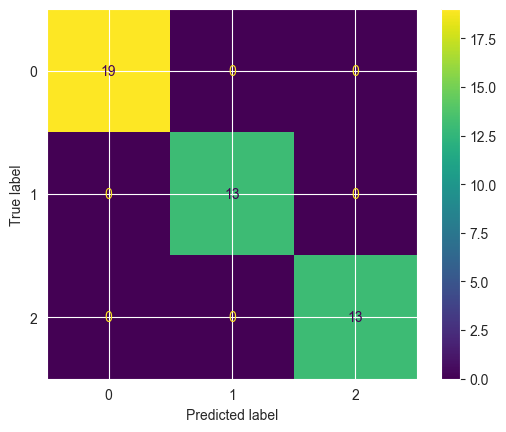

In [85]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
